# Prepare Working Notebook


##### To do:
1. Inspect null values
2. Inspect column types
3. Inspect data types
4. Look for duplicates
5. Ensure data is tidy

In [2]:
# tab data
import pandas as pd
import numpy as np

# get data
from wrangle import get_zillow

In [3]:
# getting data
df = get_zillow()

In [4]:
# inspecting shape and size
df.shape, df.size

((52441, 5), 262205)

#### Nulls

In [5]:
# looking for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52441 entries, 0 to 52440
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    52441 non-null  float64
 1   bathroomcnt                   52441 non-null  float64
 2   calculatedfinishedsquarefeet  52359 non-null  float64
 3   taxvaluedollarcnt             52440 non-null  float64
 4   fips                          52441 non-null  float64
dtypes: float64(5)
memory usage: 2.0 MB


In [15]:
# looking at the nulls
df[df.calculatedfinishedsquarefeet.isna()]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt
0,4.0,3.5,3100.0,1023282.0
1,2.0,1.0,1465.0,464000.0
2,3.0,2.0,1243.0,564778.0
3,4.0,3.0,2376.0,145143.0
4,4.0,3.0,2962.0,773303.0
...,...,...,...,...
52436,4.0,2.0,1633.0,346534.0
52437,2.0,2.0,1286.0,354621.0
52438,4.0,2.0,1612.0,67205.0
52439,3.0,1.0,1032.0,49546.0


In [10]:
# looking at other values where there are nulls 
df[df.calculatedfinishedsquarefeet.isna()].bedroomcnt.value_counts()

0.0    74
2.0     4
1.0     3
5.0     1
Name: bedroomcnt, dtype: int64

In [11]:
# a trend is seen
df[df.calculatedfinishedsquarefeet.isna()].bathroomcnt.value_counts()

0.0    74
1.0     6
1.5     1
4.5     1
Name: bathroomcnt, dtype: int64

In [13]:
df.calculatedfinishedsquarefeet.isna().sum()

82

#### Takeaways:
* There are some null values present with most of the nulls also having 0 or likely missing data in the other sections. There may be a few reasons for this but I will remove the data because there are only 82 nulls in the square feet

In [16]:
# removing the nulls associated with the square feet
df = df[df.calculatedfinishedsquarefeet.isna() == False]

In [17]:
# checking to see if other nulls were cleared
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52359 entries, 0 to 52440
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    52359 non-null  float64
 1   bathroomcnt                   52359 non-null  float64
 2   calculatedfinishedsquarefeet  52359 non-null  float64
 3   taxvaluedollarcnt             52358 non-null  float64
dtypes: float64(4)
memory usage: 2.0 MB


In [20]:
# dropping the final null becasue it is only 1 value, not necessary for us in this case
df = df.dropna()

#### Duplicates

In [35]:
# Looking for duplicates
dupes = df[df.duplicated()]
dupes

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt
672,3.0,2.0,1316.0,205123.0
835,3.0,2.0,1458.0,136104.0
1196,2.0,1.0,1421.0,35606.0
1381,4.0,3.0,2541.0,880456.0
1796,3.0,2.0,1491.0,107110.0
...,...,...,...,...
51429,6.0,4.0,3223.0,795000.0
51499,3.0,2.0,1681.0,244000.0
51777,4.0,3.0,1942.0,179912.0
52298,3.0,1.0,1038.0,41163.0


##### Takeaways:
* There are quitye a few duplicates. I will save the duplicated to a df called dupes and drop all other duplicates for time sake

In [61]:
# droppping duplicates
df = df.drop_duplicates()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52145 entries, 0 to 52440
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    52145 non-null  float64
 1   bathroomcnt                   52145 non-null  float64
 2   calculatedfinishedsquarefeet  52145 non-null  float64
 3   taxvaluedollarcnt             52145 non-null  float64
dtypes: float64(4)
memory usage: 2.0 MB


#### Outliers

In [64]:
# looking into the descriptions fot the stats
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt
count,52145.000000,52145.000000,52145.000000,5.214500e+04
mean,3.306050,2.303730,1923.634462,5.284260e+05
std,0.940064,1.020159,1004.304509,7.491016e+05
min,0.000000,0.000000,128.000000,1.000000e+03
25%,3.000000,2.000000,1268.000000,1.939120e+05
50%,3.000000,2.000000,1660.000000,3.734490e+05
75%,4.000000,3.000000,2307.000000,6.189400e+05
max,14.000000,18.000000,21929.000000,4.906124e+07


In [65]:
import matplotlib.pyplot as plt

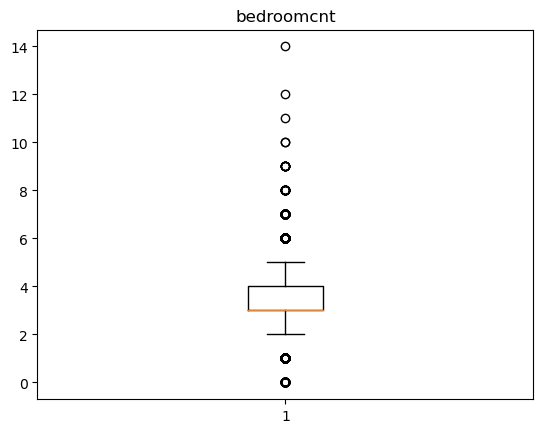

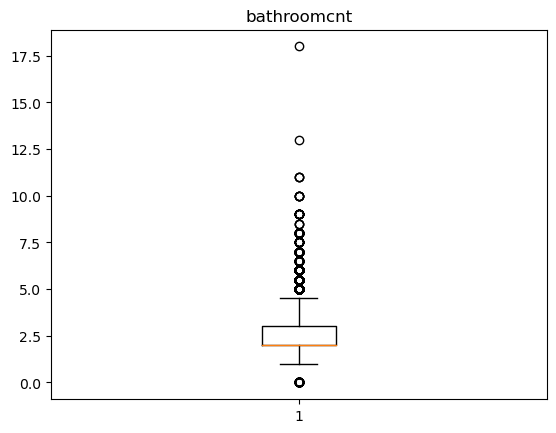

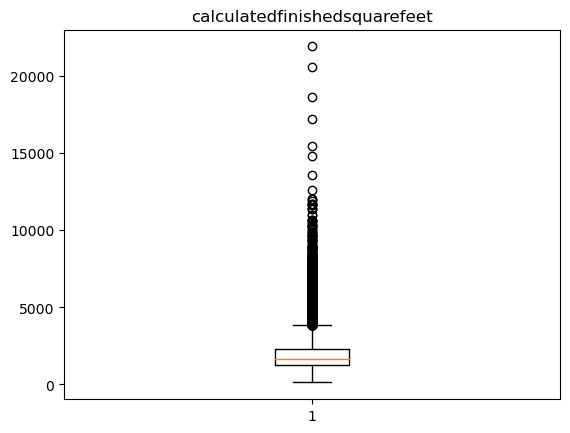

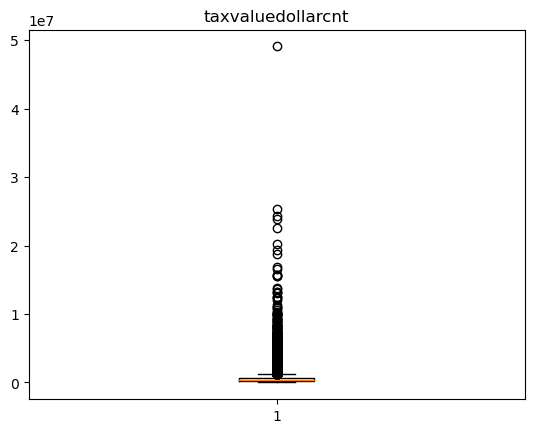

In [68]:
for col in df:
    plt.boxplot(df[col])
    plt.title(col)
    plt.show()

##### Takeways:
* There look to be outliers in each column, quite a few

##### Actions: 
* I will use 1.5 iqr to separate the outliers
* for speed's sake, I will drop all outliers and return in the future to try to address them more
* for bathrooms and bedrooms, I will remove all baths and beds that are less than 1 

In [72]:
outlier_limits = {}

# for each column in df
for col in df:
    # set quartiles
    q1, q3 = df[col].quantile([.25, .75])

    # Set iqr 
    iqr = q3 - q1

    # add to dictionary with the upper limits and lower limits
    outlier_limits[col] =  {'low_limit_5': df[col].quantile(.05),
                            'low_limit': lambda x: q1 - 1.5 * iqr,
                  'up_limit': q3 + 1.5 * iqr
                 }

In [73]:
outlier_limits

{'bedroomcnt': {'low_limit_5': 2.0, 'low_limit': 1.5, 'up_limit': 5.5},
 'bathroomcnt': {'low_limit_5': 1.0, 'low_limit': 0.5, 'up_limit': 4.5},
 'calculatedfinishedsquarefeet': {'low_limit_5': 893.0,
  'low_limit': -290.5,
  'up_limit': 3865.5},
 'taxvaluedollarcnt': {'low_limit_5': 61666.0,
  'low_limit': -443630.0,
  'up_limit': 1256482.0}}

In [93]:
# mak a copy to explore outliers later
df_outliers = df.copy()

In [96]:
# for each cols
for col in df:

    # remove all observations that exceed upper limit
    df = df[(df[col] <= outlier_limits[col]['up_limit'])]

    # remove all observations that are below the lower limit
    df = df[(df[col] >= outlier_limits[col]['low_limit'])]

In [103]:
# checking shape and outlier difference
df.shape, df_outliers.shape, df.shape[0] - df_outliers.shape[0]

((46571, 4), (52145, 4), -5574)

#### Rename columns 

In [106]:
# getting column names
df.columns

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt'],
      dtype='object')

In [105]:
# renaming columns
df = df.rename(columns={'bedroomcnt': 'beds',
                   'bathroomcnt': 'baths',
                   'calculatedfinishedsquarefeet': 'square_feet',
                   'taxvaluedollarcnt': 'tax_value'})

,beds,baths,square_feet,tax_value
0,4.0,3.5,3100.0,1023282.0
1,2.0,1.0,1465.0,464000.0
2,3.0,2.0,1243.0,564778.0
3,4.0,3.0,2376.0,145143.0
4,4.0,3.0,2962.0,773303.0
...,...,...,...,...
52436,4.0,2.0,1633.0,346534.0
52437,2.0,2.0,1286.0,354621.0
52438,4.0,2.0,1612.0,67205.0
52439,3.0,1.0,1032.0,49546.0


In [28]:
def clean_data(df, focus=True):
    '''
    Arguments: zillow df
    Actions:
        1. Removes outliers
            a. lower limit is Q1 - (1.5*IQR)
            b. upper limit is Q3 + (1.5*IQR)
        2. Drop nulls and duplicates
        3. Change column names
    Returns: cleaned df
    Modules:
        1. import scipy.stats as stats
        2. import pandas as pd
        3. import numpy as np
    '''
    
    # remove outliers
    # initialize dict
    outlier_limits = {}
    
    # for each column in df
    for col in df:
        
        if df[col].dtype != 'O':
            
            # set quartiles
            q1, q3 = df[col].quantile([.25, .75])

            # Set iqr 
            iqr = q3 - q1

            # add to dictionary with the upper limits and lower limits
            outlier_limits[col] =  {'low_limit_5': df[col].quantile(.05),
                                    'low_limit':  q1 - 1.5 * iqr,
                          'up_limit': q3 + 1.5 * iqr
                         }

    # for each cols
    for col in df:
        
        if col in outlier_limits:
            
            # remove all observations that exceed upper limit
            df = df[(df[col] <= outlier_limits[col]['up_limit'])]

            # remove all observations that are below the lower limit
            df = df[(df[col] >= outlier_limits[col]['low_limit'])]

    # drop nulls and duplicates
    df = df.dropna().drop_duplicates()
    
    # change fips codes to county names
    df.fips.replace(to_replace=[6037.0, 6059.0], value=['Los Angeles', 'Orange'], inplace=True)
    
    # change columns names
    df = df.rename(columns={'bedroomcnt': 'beds',
                  'bathroomcnt': 'baths',
                  'calculatedfinishedsquarefeet': 'square_feet',
                  'taxvaluedollarcnt': 'tax_value',
                            'fips': 'county'
                           })
    
    # adding option for insights from exploration
    if focus == True:
        
        # removes all half-bathrooms from the data
        df = df[df.baths.astype(str).str[-1] != '5']
    
    # exit function with clean df
    return df


In [13]:
df.fips.replace(to_replace=[6037.0, 6059.0], value=['Los Angeles', 'Orange'], inplace=True)

0             Orange
2             Orange
3        Los Angeles
4        Los Angeles
5        Los Angeles
            ...     
52435    Los Angeles
52436    Los Angeles
52437    Los Angeles
52439    Los Angeles
52440    Los Angeles
Name: fips, Length: 42557, dtype: object

In [29]:
df = clean_data(get_zillow())

In [30]:
# fewer rows becasue outliers were handled before the dropping the nulls and duplicates first this time, there are 2 obeservatiosn less than before
df.shape

(38281, 5)

In [11]:
df.fips.value_counts()
# 06037 = LA County
# 06059 = Orange County

6037.0    30136
6059.0    12421
Name: fips, dtype: int64

In [118]:
from prepare_module import split_data
from sklearn.model_selection import train_test_split

In [22]:
def split_data(df):
    '''
    Arguments: clean dataframe
    Actions: splits Dataframe into a train, validate, and test datasets for explorations
    Returns: train, validate, and test datasets
    Modules:
        1. from sklearn.model_selection import train_test_split
    '''
    # splitting with test focus
    train_val, test = train_test_split(df, train_size=.8, random_state=1017)
    
    #splitting with train/validate focus
    train, validate = train_test_split(train_val, train_size=.7, random_state=1017)

    # exits function and returns train, validate, test
    return train, validate, test

In [23]:
train, validate, test = split_data(clean_data(get_zillow()))

NameError: name 'train_test_split' is not defined

In [122]:
def wrangle_zillow():
    '''
    Arguments: none
    Actions:
        1. Gets zillow data
        2. Cleans zillow data
        3. Splits zillow data
    Returns: train, validate, test
    Modules: get_zillow_data, clean_data, split_data
    '''
    # splits cleaned data into train, validate, test
    train, validate, test = split_data(
        
        # cleans data
        clean_data(
        
            # retrieves data
            get_zillow()))
    
    # exits function with wrangled data
    return train, validate, test

In [124]:
train, validate, test = wrangle_zillow()

In [125]:
train, validate, test

(       beds  baths  square_feet  tax_value
 45556   4.0    2.5       2453.0   223456.0
 36590   4.0    4.0       3109.0   442694.0
 42832   3.0    1.0       1090.0   436161.0
 23832   3.0    2.0       1673.0   575452.0
 32934   4.0    3.0       1826.0   108984.0
 ...     ...    ...          ...        ...
 26771   3.0    2.0       1410.0    50684.0
 50414   2.0    1.0        933.0   657500.0
 27499   3.0    2.0       1365.0   285113.0
 20405   4.0    3.0       1967.0   240078.0
 17594   4.0    3.0       3694.0   822334.0
 
 [26078 rows x 4 columns],
        beds  baths  square_feet  tax_value
 34000   3.0    2.0       2114.0   649000.0
 29242   5.0    4.0       3732.0   283491.0
 24760   3.0    1.0       1069.0    75888.0
 51596   2.0    2.0       1114.0   709658.0
 25918   2.0    1.0       1111.0   216449.0
 ...     ...    ...          ...        ...
 18117   5.0    3.0       2992.0   370475.0
 13491   4.0    3.0       1530.0    92167.0
 19837   3.0    3.0       1798.0   495000.0
 32

In [17]:
df.head()

,beds,baths,square_feet,tax_value,county
0,4.0,3.5,3100.0,1023282.0,Orange
2,3.0,2.0,1243.0,564778.0,Orange
3,4.0,3.0,2376.0,145143.0,Los Angeles
4,4.0,3.0,2962.0,773303.0,Los Angeles
5,2.0,1.0,738.0,218552.0,Los Angeles


# Re-do

In [ ]:
def focus_data():
    '''
    
    
    '''
    

In [27]:
df_full_baths = df[df.baths.astype(str).str[-1] != '5']